<a href="https://colab.research.google.com/github/Mincheol2/VAAE/blob/main/TWR_VAE_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

## PLEASE configure your path! ##
PATH = '/content/drive/MyDrive/VAAE/modified-TWR_VAE' 

os.chdir(PATH)
os.getcwd()

'/content/drive/MyDrive/VAAE/modified-TWR_VAE'

# Argument options

- dt : Dataset(ptb / yelp / yahoo)

- epoch : Learning epoch (Ex. ptb 200 epochs : about 30mins) 

- alpha : Alpha divergence parameter

- beta : Weight for alpha divergence

- df : Gamma divergence paramter $\quad$ cf) $\gamma = - \frac{2}{df + 1}$

In [6]:
!python main.py -dt ptb --epoch 10 --alpha 1.0 --beta 1.0 #Default KL Div

Namespace(alpha=1.0, batch_size=64, beta=1.0, dataset='ptb', df=0.0, dropout=0.5, embedding_size=512, epochs=10, gpu_id='0', hidden_size=256, layers=1, load=False, lr=0.0001, min_word_count=1, model_dir='', no_cuda=False, partial=False, partial_type='last75', prior_logvar=0, prior_mu=0, rnn_type='lstm', save=True, seed=999, z_type='normal', zdim=32)
base_path= .
start to load Corpus data
start to build dictionary
start to make one-hot vectors
start to load Corpus data
start to build dictionary
start to make one-hot vectors
/usr/local/lib/python3.7/dist-packages/torch/nn/modules/rnn.py:65: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.5 and num_layers=1
  "num_layers={}".format(dropout, num_layers))
Current alpha : 1.0
Current beta : 1.0
  0% 0/10 [00:00<?, ?it/s]/content/drive/MyDrive/VAAE/modified-TWR_VAE/loss.py:54: UserWarning: To copy construct from a tensor, it is recommended to

In [54]:
!python main.py -dt ptb --epoch 10 --df 1.0 --beta 1.0 #Gamma divergence

Namespace(alpha=1.0, batch_size=64, beta=1.0, dataset='ptb', df=1.0, dropout=0.5, embedding_size=512, epochs=10, gpu_id='0', hidden_size=256, layers=1, load=False, lr=0.0001, min_word_count=1, model_dir='', no_cuda=False, partial=False, partial_type='last75', prior_logvar=0, prior_mu=0, rnn_type='lstm', save=True, seed=999, z_type='normal', zdim=32)
base_path= .
start to load Corpus data
start to build dictionary
start to make one-hot vectors
start to load Corpus data
start to build dictionary
start to make one-hot vectors
/usr/local/lib/python3.7/dist-packages/torch/nn/modules/rnn.py:65: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.5 and num_layers=1
  "num_layers={}".format(dropout, num_layers))
Current alpha : 1.0
Current beta : 1.0
Current df: 1.0 -> gamma : -1.0
  0% 0/10 [00:00<?, ?it/s]/content/drive/MyDrive/VAAE/modified-TWR_VAE/loss.py:17: UserWarning: To copy construct fro

# Visualization

The generated folder name contains dataset name, alpha, and beta. Put your parameters below, and visualize it.

In [55]:
dataset = 'ptb'
alpha = 1.0
beta = 1.0
df = 1.0 #default

In [56]:
result = pd.read_csv(f'{dataset}_recon_save_alpha{str(alpha)}_beta{str(beta)}_df{str(df)}/test_TWRvae_loss.txt',sep='\t')
result.columns=['ep', 'recon_loss', 'div_loss', 'NLL', 'PPL'] 

result

,ep,recon_loss,div_loss,NLL,PPL
0,1,138.774359,0.094220,138.868579,385.630924
1,2,135.051750,0.104388,135.156139,328.877736
2,3,132.852414,0.104280,132.956694,299.277364
3,4,130.425478,0.108066,130.533544,269.741117
4,5,128.954090,0.111235,129.065325,253.281970
5,6,127.661221,0.112092,127.773313,239.630962
6,7,126.761144,0.112918,126.874063,230.566414
7,8,125.729408,0.113138,125.842546,220.590063
8,9,124.109120,0.113351,124.222471,205.785621
9,10,123.093740,0.112968,123.206709,197.014559


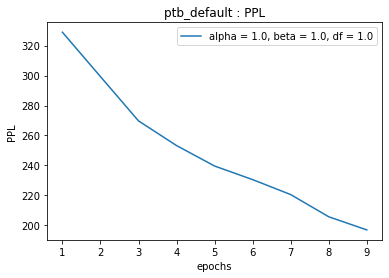

In [58]:
start_epoch = 1
end_epoch = 50 
plt.plot(result['PPL'].loc[start_epoch:50], label=f'alpha = {alpha}, beta = {beta}, df = {df}')
plt.title(f'ptb_default : PPL')
plt.xlabel('epochs')
plt.ylabel('PPL')
plt.legend()
plt.show()

Also, we can see the reconstructed sentences. 

In [59]:
#The reconstruction is made for every multiple of 10 epochs
epoch = 10 
txt_path = f'./{dataset}_recon_save_alpha{str(alpha)}_beta{str(beta)}_df{str(df)}/TWRvae_outcome_{epoch}.txt'


In [60]:
sen_pair = []
origin_sen = []
with open(txt_path, "r") as recon:
    while True:
        sen = recon.readline()
        if not sen:
            break
        if sen == '\n':
            continue
        elif 'origin: ' in sen:
            sen = sen.replace("origin: ", "")
            sen = sen.replace("\n", "")
            origin_sen.append(sen)
        elif 'reco_mu: ' in sen:
            recon_sen = sen.replace("origin: ", "")
            recon_sen = recon_sen.replace("\n", "")
            sen_pair.append((origin_sen.pop(),recon_sen))

In [61]:
len(sen_pair)

3761

See your result tuples : (origin sen, recon sen)

If you want to make result more make sense, you should spend much time to run the model. 

(more epochs, larger dataset like yahoo,yelp...)

In [69]:
sen_pair[9]

('<unk> plea <eos> <pad>', 'reco_mu: the <unk> <unk> <unk>')